In [57]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

###Loading the data

In [2]:
data_df = pd.read_csv('abalone.csv')
data_df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
sex_dictionary = {'M': 1, 'F' : 2,'I':3}
data_df['sex'] = data_df['sex'].apply(lambda x: sex_dictionary[x])

In [4]:
data_df.isnull().values.any()

False

In [ ]:
###Correlation 

In [61]:
correlation = data_df.corr()

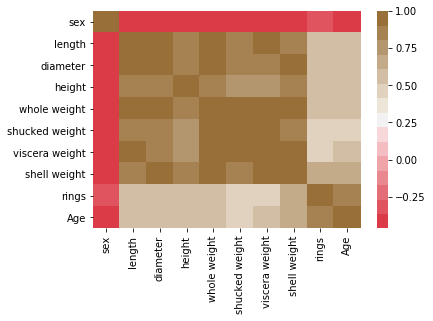

In [62]:
ax = sns.heatmap(correlation,cmap=sns.diverging_palette(10, 50, n=15))

In [63]:
correlation.style.background_gradient().set_precision(2)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,Age
sex,1,-0.45,-0.46,-0.42,-0.46,-0.44,-0.45,-0.45,-0.35,-0.39
length,-0.45,1,0.99,0.83,0.93,0.9,0.9,0.9,0.56,0.58
diameter,-0.46,0.99,1,0.83,0.93,0.89,0.9,0.91,0.57,0.6
height,-0.42,0.83,0.83,1,0.82,0.77,0.8,0.82,0.56,0.56
whole weight,-0.46,0.93,0.93,0.82,1,0.97,0.97,0.96,0.54,0.58
shucked weight,-0.44,0.9,0.89,0.77,0.97,1,0.93,0.88,0.42,0.49
viscera weight,-0.45,0.9,0.9,0.8,0.97,0.93,1,0.91,0.5,0.56
shell weight,-0.45,0.9,0.91,0.82,0.96,0.88,0.91,1,0.63,0.63
rings,-0.35,0.56,0.57,0.56,0.54,0.42,0.5,0.63,1,0.83
Age,-0.39,0.58,0.6,0.56,0.58,0.49,0.56,0.63,0.83,1


###Grouping the 'Rings' into 3 categories

In [48]:
def label_encoder(row):
    for i in data_df['rings']:
        if row['rings']>=1 and row['rings']<=8: #Young - (1-8)rings
            return 1
        elif row['rings'] >=9 and row['rings']<=10: #Middle - (9-10)rings
            return 2
        elif row['rings']>=11 and row['rings']<=29:  #Old - (11-29)rings
            return 3
    return 0

In [32]:
data_df['Age'] = data_df.apply(lambda _: '', axis=1)

In [5]:
data_df

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,3,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,2,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,2,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,2,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [50]:
data_df['Age']= data_df.apply(lambda row: label_encoder(row),axis=1)
# data_df

In [51]:
data_df.sex = data_df.sex.astype(float)
data_df

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,Age
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
5,3.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,1
6,2.0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,3
7,2.0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,3
8,1.0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,2
9,2.0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19,3


In [37]:
Y = data_df[['Age']] #Output variable is to Age
Y 

,Age
0,3
1,1
2,2
3,2
4,1
5,1
6,3
7,3
8,2
9,3


In [38]:
X=data_df.drop(['Age','rings'], axis=1)
X

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
5,3.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
6,2.0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300
7,2.0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600
8,1.0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650
9,2.0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200


In [60]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, Y)

In [58]:
#logistic regression
# log_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
clf_reg = LogisticRegression()
clf_reg.fit(train_X, train_y)
y_pred=clf_reg.predict(test_X) 
    
#Acc
print("Accuracy of Logistic Regression is:")
print(accuracy_score(test_y, y_pred))


#Report
print("Classification report for is")
print(classification_report(test_y, y_pred))

Accuracy of Logistic Regression is:
0.6248803827751196
Classification report for is
             precision    recall  f1-score   support

          1       0.67      0.77      0.71       357
          2       0.49      0.37      0.42       326
          3       0.67      0.72      0.69       362

avg / total       0.61      0.62      0.61      1045



C:\Users\cmt\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
#SVM
clf_svm = SVC(gamma='auto')
clf_svm.fit(train_X, train_y)
y_pred=clf_svm.predict(test_X)

#Acc
print("Accuracy of Random Forest is:")
print(accuracy_score(test_y, y_pred)*100)

#Report
print("Classification report for is")
print(classification_report(test_y, y_pred))



C:\Users\cmt\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Random Forest is:
61.5311004784689
Classification report for is
             precision    recall  f1-score   support

          1       0.72      0.73      0.72       357
          2       0.45      0.44      0.45       326
          3       0.66      0.65      0.66       362

avg / total       0.61      0.62      0.62      1045

